In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [7]:
df = pd.read_csv('D:/Study/Education/Projects/Student Depression/main/data/raw/data.csv')

In [8]:
df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


<Axes: ylabel='Age'>

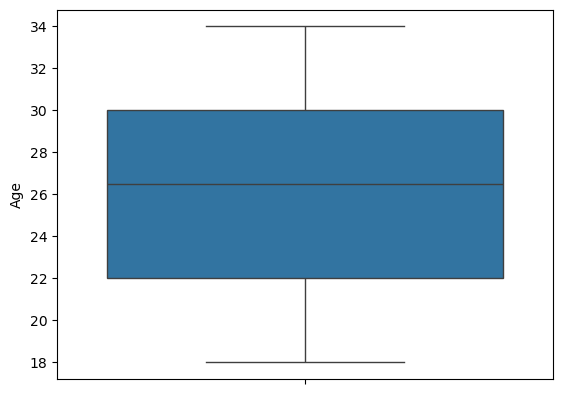

In [9]:
sns.boxplot(df['Age'])

Text(0.5, 0, 'Level')

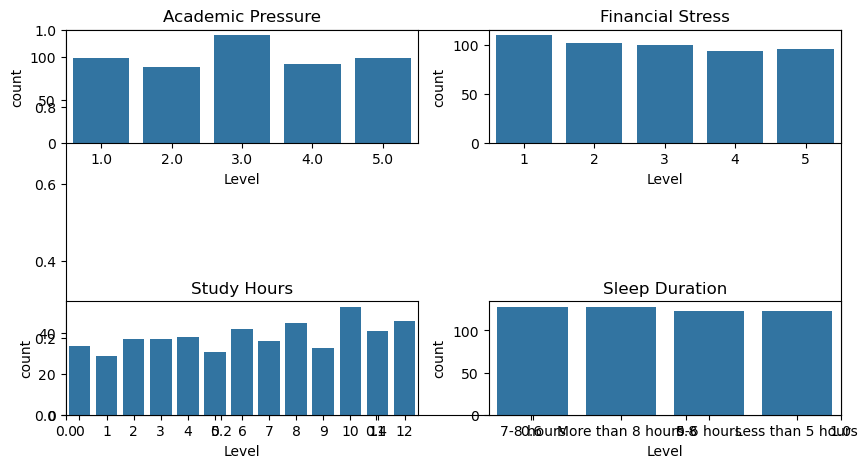

In [ ]:

plt.subplots(figsize = (10, 5))
plt.subplot(3,2,1)
sns.barplot(df['Academic Pressure'].value_counts())
plt.title('Academic Pressure')
plt.xlabel('Level')

plt.subplot(3,2,2)
sns.barplot( df['Financial Stress'].value_counts())
plt.title('Financial Stress')
plt.xlabel('Level')

plt.subplot(3,2,5)
sns.barplot(df['Study Hours'].value_counts())
plt.title('Study Hours')
plt.xlabel('Level')

plt.subplot(3,2,6)
sns.barplot(df['Sleep Duration'].value_counts())
plt.title('Sleep Duration')
plt.xlabel('Level')

In [48]:
X = df.drop(['Depression'], axis = 1)
y = df[['Depression']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
cat_col = X.select_dtypes(include = 'object').columns
num_col = X.select_dtypes(exclude = 'object').columns

scaler = StandardScaler()
encoder = OneHotEncoder()

ct = ColumnTransformer(
    [
        ('encoder', encoder, cat_col),
        ('scaler', scaler, num_col)
    ]
)

In [51]:
colno = 0
for col_name, col in X.items():
    if col_name in cat_col:
        print(f'Column {col_name} spread to {colno + col.nunique()}')
        colno += col.nunique()
    if col_name in num_col:
        print(f'Column {col_name} spread to {colno + 1}')
        colno += 1

Column Gender spread to 2
Column Age spread to 3
Column Academic Pressure spread to 4
Column Study Satisfaction spread to 5
Column Sleep Duration spread to 9
Column Dietary Habits spread to 12
Column Have you ever had suicidal thoughts ? spread to 14
Column Study Hours spread to 15
Column Financial Stress spread to 16
Column Family History of Mental Illness spread to 18


In [43]:
X_train = pd.DataFrame(ct.fit_transform(X_train))
X_test = pd.DataFrame(ct.transform(X_test))

kmeans = KMeans(n_clusters = 2)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC1', 'PC2'], 
                        index=X_train.columns)

print(loadings)

         PC1       PC2
0  -0.031564  0.061837
1   0.031564 -0.061837
2   0.029973  0.033453
3   0.001290 -0.000674
4  -0.011613 -0.023805
5  -0.019649 -0.008974
6   0.036995 -0.014897
7  -0.002916 -0.023335
8  -0.034078  0.038232
9  -0.065136 -0.035168
10  0.065136  0.035168
11  0.043652  0.025326
12 -0.043652 -0.025326
13  0.466394 -0.539832
14  0.620063  0.149465
15 -0.503551 -0.308054
16  0.349470  0.140005
17 -0.063696  0.745885


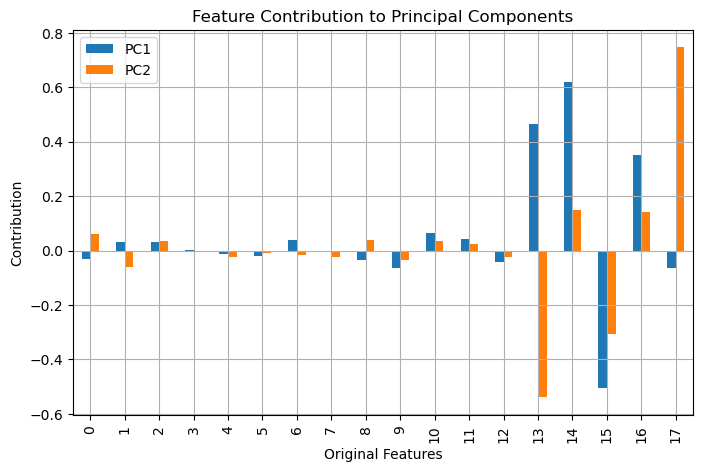

In [44]:
fig, ax = plt.subplots(figsize=(8,5))
loadings.plot(kind='bar', ax=ax)
plt.title('Feature Contribution to Principal Components')
plt.xlabel('Original Features')
plt.ylabel('Contribution')
plt.grid(True)
plt.show()

In [35]:
X_train

array([[ 7.72401562e-01, -1.61783143e-01],
       [-8.87380908e-01,  9.54009778e-01],
       [ 1.29013717e+00,  1.39997963e+00],
       [ 8.90630867e-01,  2.29037782e-01],
       [-2.59727471e-01,  5.75449214e-01],
       [-1.36854890e+00, -5.46098087e-01],
       [ 5.60657509e-01,  1.19983702e+00],
       [ 1.42381340e+00, -1.86707129e+00],
       [ 4.66630161e-01, -1.25350909e+00],
       [-1.96787024e+00,  1.44189922e+00],
       [ 3.49646843e-01,  2.13881312e-01],
       [ 5.25137714e-01, -8.54094493e-02],
       [ 1.00576304e+00, -1.75991091e+00],
       [-4.34103513e-01, -1.60679562e+00],
       [ 2.81954227e+00,  1.35320386e+00],
       [-4.36692786e-01, -1.41334829e+00],
       [ 2.89189817e-01,  1.72870469e+00],
       [-2.98906123e-02, -1.57696285e+00],
       [-1.49282456e+00,  1.19872812e+00],
       [-4.86163716e-01, -1.49813389e+00],
       [ 1.74282291e-01, -1.71232220e+00],
       [-9.26562766e-01,  1.51223022e+00],
       [ 1.40065732e+00,  1.07756668e+00],
       [ 8.

d:\Study\Setup\anaconda\config\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0.5, 1.0, 'Training data')

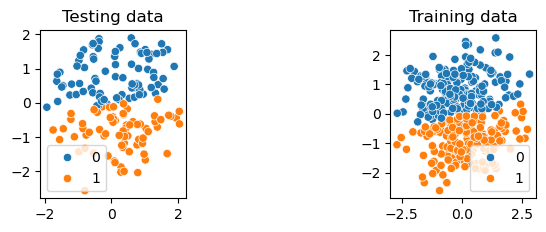

In [40]:
kmeans.fit(X_train, y_train)

y_pred = kmeans.predict(X_test)

plt.subplot(2,3,1)
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue = y_pred)
plt.title('Testing data')

plt.subplot(2,3,3)
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue = kmeans.predict(X_train))
plt.title('Training data')